## do-mpc model and solver setup

In [35]:
import do_mpc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

model_type = 'continuous' 
model = do_mpc.model.Model(model_type)

#x_1' = x_2 = x'
#x_2' = (-k/m)x_1 - (c/m)x_2 + (1/m)u = x''
x_1 = model.set_variable(var_type='_x', var_name='x_1', shape=(1,1))
x_2 = model.set_variable(var_type='_x', var_name='x_2', shape=(1,1))

#defining the control input
u = model.set_variable(var_type='_u', var_name='u')

# Parameters
m = 20
k = 2
c = 4

## Set the right hand sides of the ODEs and set MPC parameters

In [36]:
#right hand side of the ODE
model.set_rhs('x_1', x_2)
model.set_rhs('x_2', (-k/m)*x_1 - (c/m)*x_2 + (1/m)*u)

x0 = np.array([0, 0])
model.x0 = x0
model.setup()

## Set simulation parameters

In [37]:
simulator = do_mpc.simulator.Simulator(model)
simulator.set_param(t_step = 0.1)
simulator.setup()
simulator.x0 = x0

## Running simulation

In [38]:
# Customizing Matplotlib:
mpl.rcParams['font.size'] = 18
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['axes.grid'] = True
sim_graphics = do_mpc.graphics.Graphics(simulator.data)

In [39]:
%%capture
# We just want to create the plot and not show it right now. This "inline magic" supresses the output.
fig, ax = plt.subplots(2, sharex=True, figsize=(10,14))
fig.align_ylabels()

In [40]:

for g in [sim_graphics]:
    # Plot the angle positions (phi_1, phi_2, phi_2) on the first axis:
    g.add_line(var_type='_x', var_name='x_1', axis=ax[0])
    g.add_line(var_type='_x', var_name='x_2', axis=ax[0])

    # Plot the set motor positions (phi_m_1_set, phi_m_2_set) on the second axis:
    g.add_line(var_type='_u', var_name='u', axis=ax[1])


ax[0].set_ylabel('states [m, m/s]')
ax[1].set_ylabel('control input [F]')
ax[1].set_xlabel('time [s]')
ax[0].set_title('Spring-Mass-Damper System')

# Add a legend to the first axis
ax[0].legend(['Position', 'Velocity'])
# Add a legend to the second axis
ax[1].legend(['Control Input'])

### Perform simulation

In [41]:
u0 = np.ones((1,1))
for i in range(400):
    simulator.make_step(u0)

### Plot results

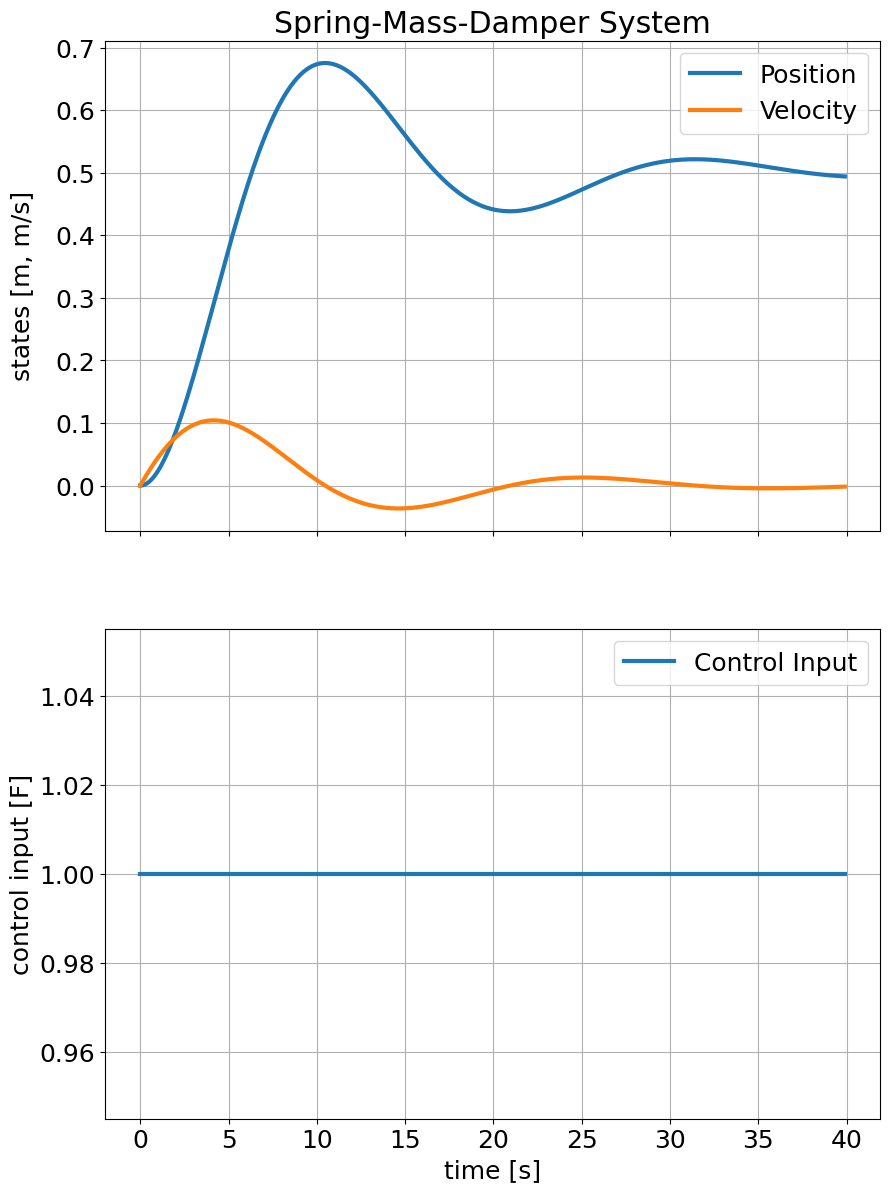

In [42]:
sim_graphics.plot_results()
# Reset the limits on all axes in graphic to show the data.
sim_graphics.reset_axes();fig